In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.lines import Line2D
from sklearn.linear_model import LogisticRegression

In [63]:
Policies=pd.read_csv('police_policies.csv')

In [65]:
Policies.fillna(0,inplace=True)
Policies.head()

,City,Requires De-Escalation,Has Use of Force Continuum,Bans Chokeholds and Strangleholds,Requires Warning Before Shooting,Restricts Shooting at Moving Vehicles,Requires Exhaust All Other Means Before Shooting,Duty to Intervene,Requires Comprehensive Reporting
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albuquerque,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
2,Anaheim,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,Anchorage,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Arlington,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [5]:
All_stats=pd.read_csv('deaths_and_stats.csv')
Cities=All_stats[['State','City','PD']]
Deaths=All_stats.iloc[:,3:10]
Deaths.rename(columns={Deaths.columns[0]:'Black_killed',Deaths.columns[1]:'Hispanic_killed',\
                       Deaths.columns[2]:'NativeAm_killed',Deaths.columns[3]:'Asian_killed',\
                       Deaths.columns[4]:'PacificIsl_killed',Deaths.columns[5]:'White_killed',\
                      Deaths.columns[6]:'Unkown_killed'},inplace=True)
Population=All_stats.iloc[:,10:20]
Crimes=All_stats.iloc[:,20:]

In [6]:
Deaths.fillna(0,inplace=True)
# Deaths=Deaths.append(Deaths.sum(axis=0).rename('Total'))
Deaths['Total_killed']=Deaths.sum(axis=1)

dea_cols=list(Deaths.columns)
for i in range(len(Deaths.columns)-1):
    new_name=dea_cols[i]+'_percentage'
    Deaths[new_name]=100*Deaths.iloc[:,i]/Deaths['Total_killed']
Deaths.fillna(0,inplace=True)

In [15]:
pop_cols=list(Population.columns)
for i in range(len(Population.columns)-1):
    Population.iloc[:,i]=pd.to_numeric(Population.iloc[:,i].str.replace(',',''))
    if i>0:
        new_name=pop_cols[i]+'_percentage'
        Population[new_name]=100*Population.iloc[:,i]/Population['Total']
Deaths['Total_killed_per_population']=Deaths['Total_killed']/Population['Total']

In [88]:
chosen_policies=Policies[[Policies.columns[1],Policies.columns[4],Policies.columns[-3],Policies.columns[-1]]]

In [89]:
chosen_policies=chosen_policies.iloc[1:,:]

In [16]:
Deaths.head()

,Black_killed,Hispanic_killed,NativeAm_killed,Asian_killed,PacificIsl_killed,White_killed,Unkown_killed,Total_killed,Black_killed_percentage,Hispanic_killed_percentage,NativeAm_killed_percentage,Asian_killed_percentage,PacificIsl_killed_percentage,White_killed_percentage,Unkown_killed_percentage,Total_killed_per_population
0,3.0,18.0,0.0,0.0,0.0,10.0,1.0,32.0,9.375000,56.250000,0.000000,0.000000,0.0,31.250000,3.125000,0.000059
1,3.0,7.0,0.0,0.0,0.0,3.0,0.0,13.0,23.076923,53.846154,0.000000,0.000000,0.0,23.076923,0.000000,0.000039
2,1.0,1.0,2.0,0.0,0.0,5.0,4.0,13.0,7.692308,7.692308,15.384615,0.000000,0.0,38.461538,30.769231,0.000045
3,7.0,1.0,0.0,1.0,0.0,4.0,1.0,14.0,50.000000,7.142857,0.000000,7.142857,0.0,28.571429,7.142857,0.000038
4,13.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0,86.666667,0.000000,0.000000,0.000000,0.0,6.666667,6.666667,0.000036


### Quick look at effects of couple policies on police killings

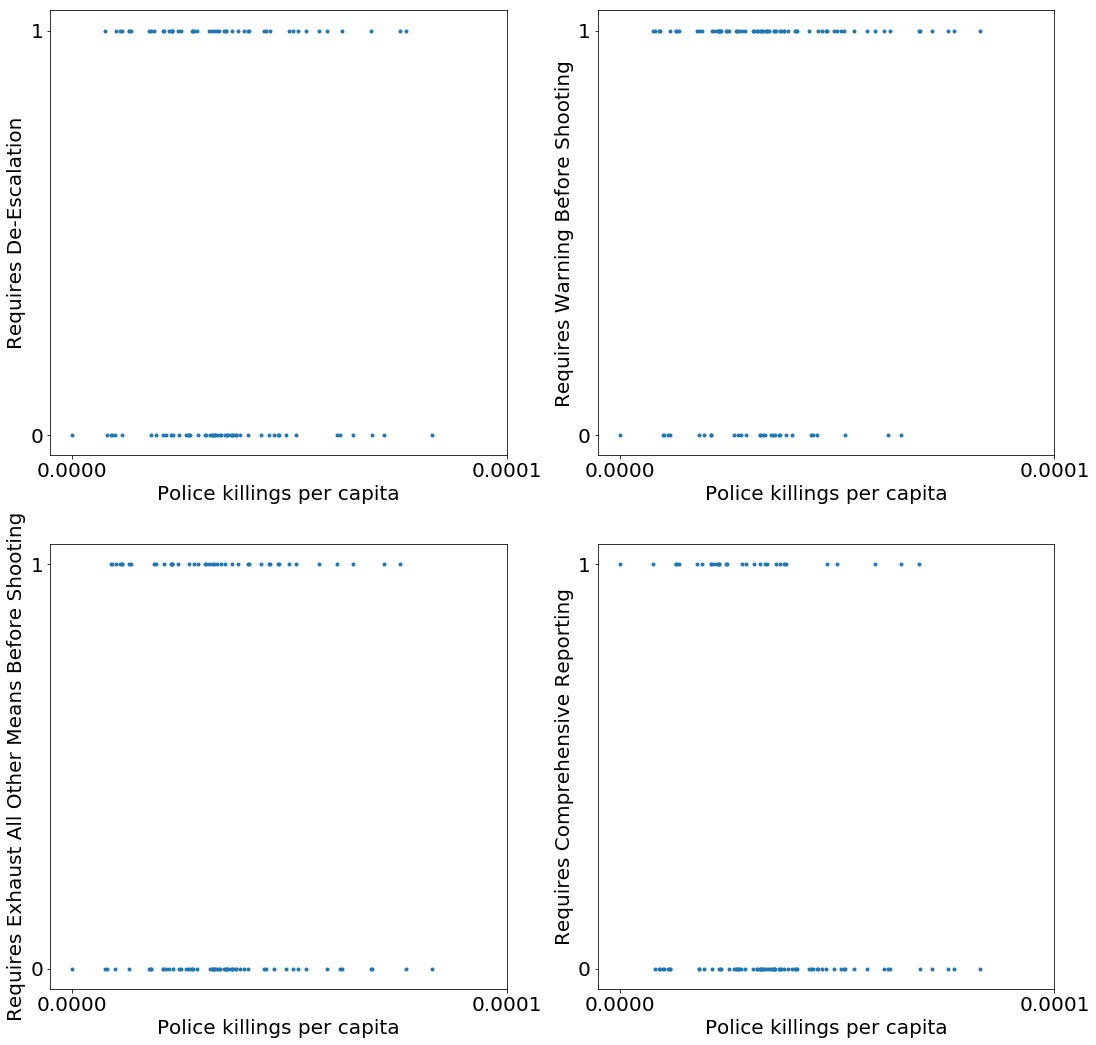

In [52]:
fig=plt.figure(figsize=(18,18))
killed_per_capita=Deaths['Total_killed_per_population']
X=np.linspace(0,0.0001,100)

for i in range(4):
    desq=pd.to_numeric(chosen_policies.iloc[:,i])


    ax=fig.add_subplot(2,2,i+1)
    ax.plot(killed_per_capita,desq,'.')

    ax.set_xlabel('Police killings per capita',fontsize=20)
    ax.set_ylabel(chosen_policies.columns[i],fontsize=20)

    ax.set_xlim([-0.000005,0.0001])
    ax.set_yticks([0,1])
    ax.set_xticks([0,0.0001])
    ax.set_ylim([-0.05,1.05])
    ax.tick_params(axis='x',labelsize=20)
    ax.tick_params(axis='y',labelsize=20)

In [90]:
chosen_policies=chosen_policies[[chosen_policies.columns[1],chosen_policies.columns[-1]]]

In [67]:
chosen_policies.head()

,Requires Warning Before Shooting,Requires Comprehensive Reporting
1,1.022061,1.033384
2,1.093880,0.044965
3,0.071787,0.076332
4,0.027641,1.040883
5,0.034235,0.026511


In [91]:
noise=(np.random.rand(100,2)-0.5)/3
chosen_policies=chosen_policies+noise

Text(0.8, 0.4, 'red - $29.8 \\% $\nblue - $55.3 \\% $\ngreen - $14.9 \\% $')

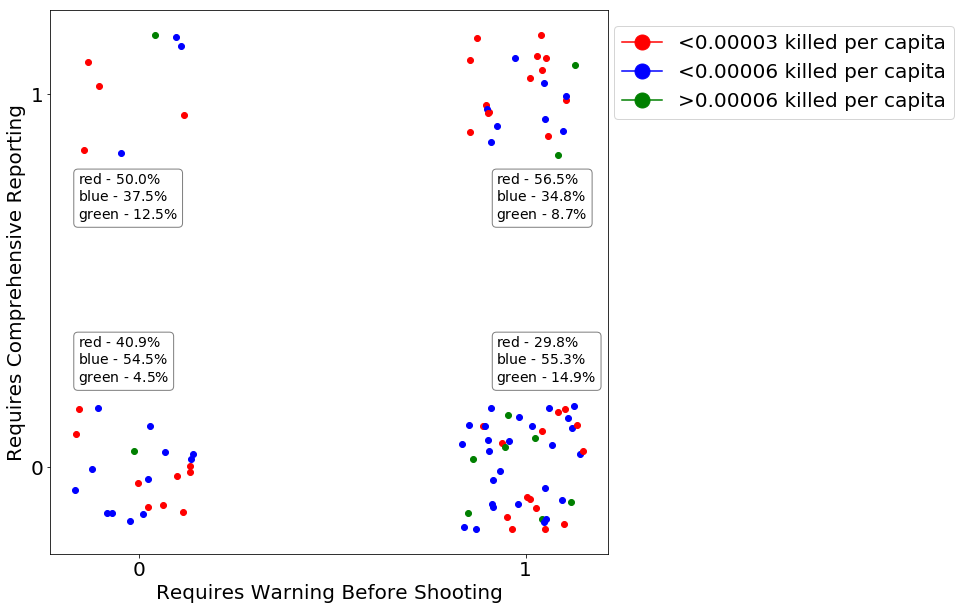

In [142]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
counts=np.zeros((2,2,3))
for i in range(100):
    if killed_per_capita[i]<0.00003:

        counts[int(round(chosen_policies.iloc[i,0])),int(round(chosen_policies.iloc[i,1])),0]+=1
        ax.plot(chosen_policies.iloc[i,0],chosen_policies.iloc[i,1],'ro')
    elif killed_per_capita[i]<0.00006:

        ax.plot(chosen_policies.iloc[i,0],chosen_policies.iloc[i,1],'bo')
        counts[int(round(chosen_policies.iloc[i,0])),int(round(chosen_policies.iloc[i,1])),1]+=1
#     elif killed_per_capita[i]<0.000075:
#         ax.plot(chosen_policies.iloc[i,0],chosen_policies.iloc[i,1],'go')
    else:
        counts[int(round(chosen_policies.iloc[i,0])),int(round(chosen_policies.iloc[i,1])),2]+=1
        ax.plot(chosen_policies.iloc[i,0],chosen_policies.iloc[i,1],'go')
ax.set_xlabel(chosen_policies.columns[0],fontsize=20)
ax.set_ylabel(chosen_policies.columns[1],fontsize=20)

ax.set_yticks([0,1])
ax.set_xticks([0,1])

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)


legend_elements = [Line2D([0], [0], marker='o', color='r', label='<0.00003 killed per capita',
                          markerfacecolor='r', markersize=15),
                   Line2D([0], [0], marker='o', color='b', label='<0.00006 killed per capita',
                          markerfacecolor='b', markersize=15),
                   Line2D([0], [0], marker='o', color='g', label='>0.00006 killed per capita',
                          markerfacecolor='g', markersize=15)]

ax.legend(handles=legend_elements, loc=(1.01,0.8),fontsize=20)

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

textstr = '\n'.join((
    r'red - $%.1f \%% $' % (100*counts[0,0,0]/np.sum(counts[0,0,:]), ),
    r'blue - $%.1f \%% $' % (100*counts[0,0,1]/np.sum(counts[0,0,:]), ),
    r'green - $%.1f \%% $' % (100*counts[0,0,2]/np.sum(counts[0,0,:]))))

ax.text(0.05, 0.4, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top',bbox=props)

textstr = '\n'.join((
    r'red - $%.1f \%% $' % (100*counts[0,1,0]/np.sum(counts[0,1,:]), ),
    r'blue - $%.1f \%% $' % (100*counts[0,1,1]/np.sum(counts[0,1,:]), ),
    r'green - $%.1f \%% $' % (100*counts[0,1,2]/np.sum(counts[0,1,:]))))

ax.text(0.05, 0.7, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top',bbox=props)

textstr = '\n'.join((
    r'red - $%.1f \%% $' % (100*counts[1,1,0]/np.sum(counts[1,1,:]), ),
    r'blue - $%.1f \%% $' % (100*counts[1,1,1]/np.sum(counts[1,1,:]), ),
    r'green - $%.1f \%% $' % (100*counts[1,1,2]/np.sum(counts[1,1,:]))))

ax.text(0.8, 0.7, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top',bbox=props)

textstr = '\n'.join((
    r'red - $%.1f \%% $' % (100*counts[1,0,0]/np.sum(counts[1,0,:]), ),
    r'blue - $%.1f \%% $' % (100*counts[1,0,1]/np.sum(counts[1,0,:]), ),
    r'green - $%.1f \%% $' % (100*counts[1,0,2]/np.sum(counts[1,0,:]))))

ax.text(0.8, 0.4, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top',bbox=props)